<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/Recommendation_Systems_using_weighted_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
credits= pd.read_csv("/content/drive/My Drive/tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
movies_df= pd.read_csv("/content/drive/My Drive/tmdb_5000_movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
#mergiing the two dataset based on a similar column which is id
#to merge we need to first convert the movie id column to id and then we will perform the further action

In [5]:
credits.shape, movies_df.shape

((4803, 4), (4803, 20))

In [6]:
#this is the way to rename a column
credits_column_renamed= credits.rename(index=str,columns = {'movie_id':'id'})
credits_column_renamed

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [0]:
#now merging both the columns
#Merge DataFrame or named Series objects with a database-style join.

#The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.

In [0]:
movies_df_merge= movies_df.merge(credits_column_renamed, on="id")

In [9]:
movies_df_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies_df_merge.shape

(4803, 23)

In [0]:
#cleaning the dataset by removing unwanted columns


In [0]:
movies_cleaned_df= movies_df_merge.drop(["homepage", "title_x", "title_y", "status", "production_countries"], axis=1)

In [13]:
movies_cleaned_df.shape

(4803, 18)

In [20]:
#checking the nan values
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [0]:
movies_cleaned_df=movies_cleaned_df.dropna(axis=0)

In [23]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3959 non-null   int64  
 1   genres                3959 non-null   object 
 2   id                    3959 non-null   int64  
 3   keywords              3959 non-null   object 
 4   original_language     3959 non-null   object 
 5   original_title        3959 non-null   object 
 6   overview              3959 non-null   object 
 7   popularity            3959 non-null   float64
 8   production_companies  3959 non-null   object 
 9   release_date          3959 non-null   object 
 10  revenue               3959 non-null   int64  
 11  runtime               3959 non-null   float64
 12  spoken_languages      3959 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          3959 non-null   float64
 15  vote_count           

In [25]:
movies_cleaned_df.mean()

budget          3.344110e+07
id              5.003059e+04
popularity      2.469113e+01
revenue         9.690687e+07
runtime         1.080533e+02
vote_average    6.181940e+00
vote_count      8.081046e+02
dtype: float64

#Weighted average formula

W= Rv + Cm / v + m

Here R stands for average for the movie as a rating from 0 to 10 (mean) = (Rating)

v for no. of votes for the movie= (votes)

m for minimum votes required to be listed in the top 250 (currently 3000)

C for the mean vote across the whole report (currently 6.1)

In [0]:
#creating the above mentioned variables

v= movies_cleaned_df["vote_count"]
R= movies_cleaned_df["vote_average"]
C= movies_cleaned_df["vote_average"].mean()
m= movies_cleaned_df["vote_count"].quantile(0.70)

#here quantile means take those movies into account whose percentile above 70% rest leave all others

In [31]:
v

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4795        1
4796      658
4798      238
4799        5
4801        7
Name: vote_count, Length: 3959, dtype: int64

In [33]:
R

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4795    6.0
4796    6.9
4798    6.6
4799    5.9
4801    5.7
Name: vote_average, Length: 3959, dtype: float64

In [36]:
C, m

(6.1819398838090445, 720.0)

In [0]:
movies_cleaned_df["weighted_average"]= ((R*v) + (C*m)) / (v+m)

In [40]:
movies_cleaned_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.141453
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.800957
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.283609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.496092
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.120744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Sometimes you've got to break the rules,6.0,1,"[{""cast_id"": 2, ""character"": ""The Girl"", ""cred...","[{""credit_id"": ""52fe4ab0c3a368484e161add"", ""de...",6.181688
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What happens if it actually works?,6.9,658,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_...","[{""credit_id"": ""52fe45e79251416c75066791"", ""de...",6.524816
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united s

In [0]:
movie_sorted_ranking= movies_cleaned_df.sort_values("weighted_average", ascending=False)

In [47]:
movie_sorted_ranking[["original_title", "vote_count", "vote_average", "weighted_average", "popularity"]].head(30)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.312997,136.747729
3337,The Godfather,5893,8.4,8.158505,143.659698
662,Fight Club,9413,8.3,8.149501,146.757391
3232,Pulp Fiction,8428,8.3,8.133297,121.463076
65,The Dark Knight,12002,8.2,8.085788,187.322927
809,Forrest Gump,7927,8.2,8.031964,138.133331
96,Inception,13752,8.1,8.004574,167.583710
1818,Schindler's List,4329,8.3,7.997959,104.469351
3865,Whiplash,4254,8.3,7.993405,192.528841
95,Interstellar,10867,8.1,7.980814,724.247784


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

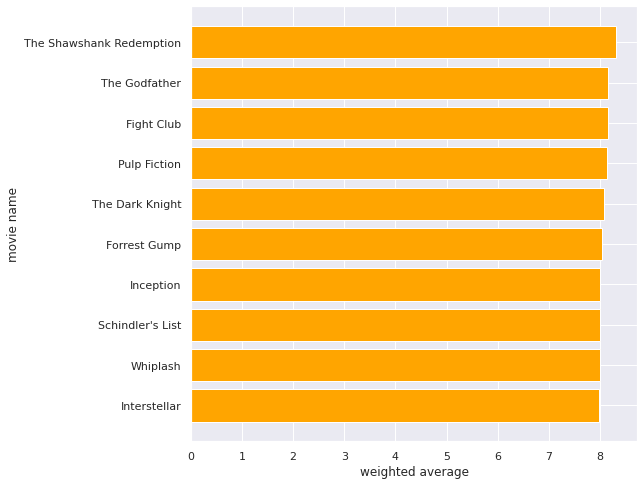

In [60]:
weight_average= movie_sorted_ranking.sort_values("weighted_average", ascending=False)
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(weight_average["original_title"].head(10), weight_average["weighted_average"].head(10), align='center', color="orange")
ax.invert_yaxis()
plt.xlabel("weighted average")
plt.ylabel("movie name")
plt.show()

In [0]:
#this above graph is made from the voting count and voting average, we can use popularity as a parameter to distinguish the movies and recommend based on the same

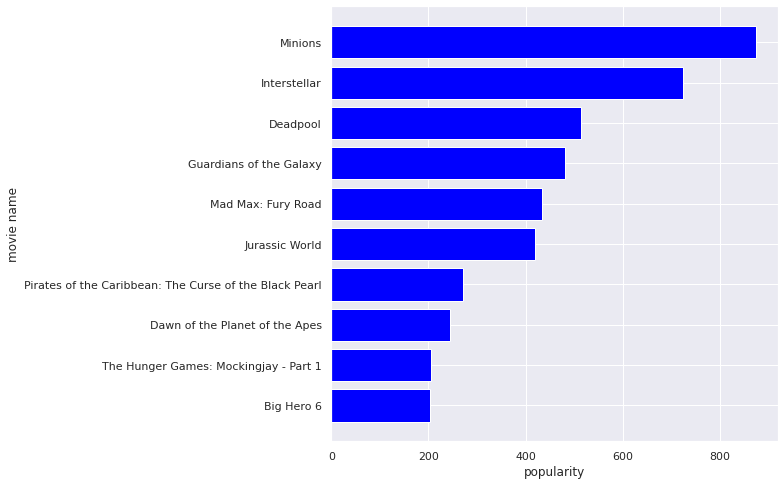

In [62]:
popularity_df= movie_sorted_ranking.sort_values("popularity", ascending=False)
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(popularity_df["original_title"].head(10), popularity_df["popularity"].head(10), align='center', color="blue")
ax.invert_yaxis()
plt.xlabel("popularity")
plt.ylabel("movie name")
plt.show()

In [0]:
#combining the popularity and weighted average by taking the importance of each 50%

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

scaled_movies= scaler.fit_transform(movies_cleaned_df[["weighted_average", "popularity"]])

In [66]:
normalized_df= pd.DataFrame(scaled_movies, columns=["weighted_average", "popularity"])
normalized_df.head()

,weighted_average,popularity
0,0.663837,0.171814
1,0.566135,0.158846
2,0.417687,0.122634
3,0.765597,0.128272
4,0.370954,0.050169


In [0]:
movies_cleaned_df[["normalized_weight_average", "normalized_popularity"]] = normalized_df

In [69]:
movies_cleaned_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.141453,0.663837,0.171814
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.800957,0.566135,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.283609,0.417687,0.122634
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.496092,0.765597,0.128272
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.120744,0.370954,0.050169


In [0]:
movies_cleaned_df["score"] = movies_cleaned_df["normalized_weight_average"] * 0.5 + movies_cleaned_df["normalized_popularity"] * 0.5

In [72]:
movies_scored= movies_cleaned_df.sort_values(["score"], ascending=False)
movies_scored.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_average,normalized_weight_average,normalized_popularity,score
91,165000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",47933,"[{""id"": 12026, ""name"": ""alternate history""}, {...",en,Independence Day: Resurgence,We always knew they were coming back. Using re...,48.775723,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-06-22,389681935,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",We had twenty years to prepare. So did they.,4.9,2491,"[{""cast_id"": 5, ""character"": ""Jake Morrison"", ...","[{""credit_id"": ""5763d39cc3a36860a5000168"", ""de...",5.187448,0.904683,0.827162,0.865923
531,75000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 28, ""nam...",203801,"[{""id"": 470, ""name"": ""spy""}, {""id"": 2106, ""nam...",en,The Man from U.N.C.L.E.,"At the height of the Cold War, a mysterious cr...",48.744209,"[{""name"": ""Davis Entertainment"", ""id"": 1302}, ...",2015-08-13,108145109,116.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Saving the world never goes out of style.,7.1,2265,"[{""cast_id"": 3, ""character"": ""Napoleon Solo"", ...","[{""credit_id"": ""5630caf09251416167001e3d"", ""de...",6.878558,0.442570,1.000000,0.721285
90,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",5255,"[{""id"": 1991, ""name"": ""santa claus""}, {""id"": 5...",en,The Polar Express,When a doubting young boy takes an extraordina...,47.323228,"[{""name"": ""Golden Mean"", ""id"": 1867}, {""name"":...",2004-11-10,305875730,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",This holiday season... believe.,6.4,1474,"[{""cast_id"": 26, ""character"": ""Hero Boy / Fath...","[{""credit_id"": ""52fe4400c3a36847f807c981"", ""de...",6.328440,0.847567,0.549462,0.698515
765,60000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",786,"[{""id"": 922, ""name"": ""hotel room""}, {""id"": 176...",en,Almost Famous,Almost Famous is an autobiographical inspired ...,21.547446,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2000-09-15,47383689,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Experience it. Enjoy it. Just don't fall for it.,7.4,797,"[{""cast_id"": 14, ""character"": ""Penny Lane"", ""c...","[{""credit_id"": ""52fe4276c3a36847f80207d1"", ""de...",6.821883,0.716544,0.587689,0.652116
1770,27000000,"[{""id"": 53, ""name"": ""Thriller""}]",303858,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 1589, ""na...",en,Money Monster,Financial TV host Lee Gates and his producer P...,38.279458,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...",2016-05-12,93282604,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Not every conspiracy is a theory.,6.5,1068,"[{""cast_id"": 6, ""character"": ""Lee Gates"", ""cre...","[{""credit_id"": ""55693b229251416b04000b3e"", ""de...",6.371922,1.000000,0.156179,0.578090


In [0]:
scored= movies_cleaned_df.sort_values("score", ascending=False)

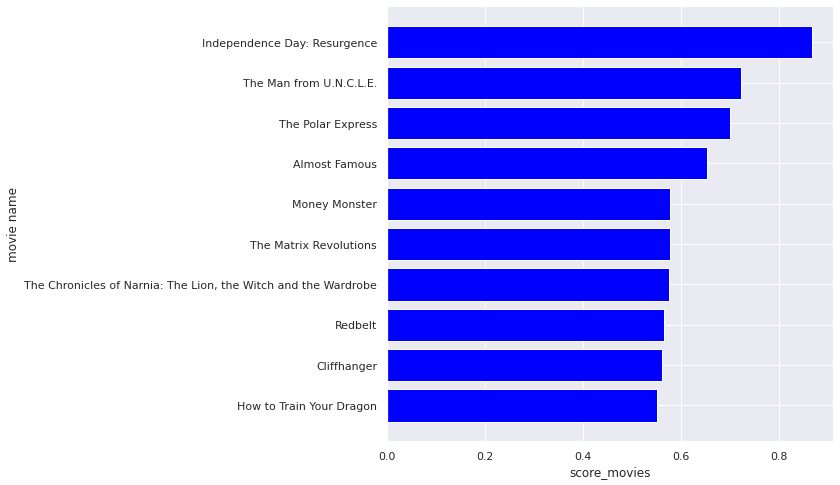

In [75]:
#popularity_df= movie_sorted_ranking.sort_values("popularity", ascending=False)
#plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(scored["original_title"].head(10), scored["score"].head(10), align='center', color="blue")
ax.invert_yaxis()
plt.xlabel("score_movies")
plt.ylabel("movie name")
plt.show()